# Hierarchical Clustering

Often results are same as K-Means clustering.

Two tpyes:
1) Agglomerative
2) Divisive

Agglomerative is a bottom up approach. Divisive is top down. Will concentrate on agglomerative.

#### Agglomerative HC

STEP1: Make each data point a single point cluster -> form N clusters

STEP2: Take the two closest points and make them one cluster -> That forms N-1 clusters

STEP3: Take the two closest clusters and make them one cluster -> forms N-2 clusters

STEP4: Repeat STEP3 until there is only one cluster

Closest clusters? Can use Euclidean distance. But there are more than one distance that can be defined as the distance between two clusters.

1) Closest points
2) Furthest points
3) Average distance between points
4) Distance between centroids

This is a crucial element and care must be taken with the decision.

#### Dendrograms

Look like family trees. Act as a 'memory' for the HC algorithm.

Need to set a disimilarity threshold (A distance values, the y axis on the dendrogram) and therefore the number clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Information on mall customers that use a membership card. A computed metric 'Spending score' indicates how much the customer spends. You've been hired to find clusters of data that includes the features annual income and spending score.

In [3]:
X = dataset.iloc[:, [3, 4]].values
X.shape

(200, 2)

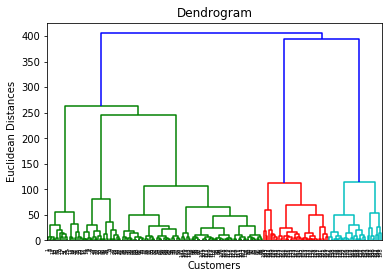

In [5]:
# Using dendrogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch
den = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.xlabel('Customers');

Can see from the dendrogram, the elbow is clearly at 5 clusters. Do this by splitting the largest vetical distance.

In [9]:
# Fit HC to mall data
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

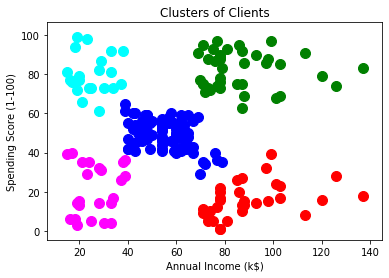

In [12]:
# Visualise results
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1],
            s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1],
            s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1],
            s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1],
            s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1],
            s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

Same results as k-means